# M4_1_3 Bike Sharing Day, Linear Regression

The regression model is a statistical procedure that allows a researcher to estimate the linear, or straight line, relationship that relates two or more variables.

The programming algorithm for implementing a regression model using the Closed-form Solution!is:

    1. Load the dataset and split the data into training and testing datasets
    2. Calculate the coefficients W, adding a column for W0
    3. Make predictions using the closed form solution
    4. Measure the total error of the algorthim

## 1. Load the dataset and analyze features

Download the "daily" dataset from: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, and load the data in two variables X, and Y. X will be the features or attributes and Y is the output. In this case the output is the number of bike rentals. 

The user of the algorithm wants to predict the number of rents according several attributes. 

It is important to review the data before use it, in order to delete those attributes that do not contribute to the learning algorithm.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from sklearn.model_selection import train_test_split

In [2]:
#1. Load the dataset and analyze the information
df_bikes = pd.read_csv('day.csv')

df_bikes = df_bikes.drop(['cnt', 'instant', 'dteday', 'casual'], axis=1)

df_bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1518
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,1867
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,2451
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1182
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1432


In [3]:
#Analize dataset if it has null values
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  registered  731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [4]:
#Review the mean and max of the features
df_bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,3656.172367
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1560.256377
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,20.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,2497.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,3662.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,4776.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,6946.000000


In [5]:
#Convert dataset in X numpy matrix, and obtain de Y array (output).
def df_to_np(data):
    x = np.array(data.iloc[:,0:11])
    y = np.array(data.iloc[:,-1])
    return x, y, data
#Testing

x, y, df_bikes = df_to_np(df_bikes)

print('X size: ', np.shape(x), 'Y size: ', np.shape(y))

X size:  (731, 11) Y size:  (731,)


## 2. Split dataset into training and testing data

In [6]:
# 2. Split datasets
def splitDataset(x, y, test_size):

    xTrain, xTest, yTrain, yTest = train_test_split(
        x, y, test_size=test_size, random_state=0)

    return xTrain, xTest, yTrain, yTest


# Testing
test_size = 0.33
xTrain, xTest, yTrain, yTest = splitDataset(x, y, test_size)


print('Split X', len(x), 'into train with',
      len(xTrain), 'and test with', len(xTest))


Split X 731 into train with 489 and test with 242


## 2. Caculate the coefficients W

In this step, we must add a "ones" column that corresponds to $W_0$ coefficientes, according to the form:

$
X = \begin{bmatrix}
  1 \quad x_{11} \quad x_{12} \quad... \quad x_{1m} \\
  1 \quad x_{21} \quad x_{22} \quad... \quad x_{2m} \\
  \vdots \\
  1 \quad x_{n1} \quad x_{n2} \quad... \quad x_{nm} \\
\end{bmatrix},
\hspace{10pt}
$
$
W = \begin{bmatrix}
   w_0 \\
   w_1 \\
  \vdots \\
   w_m \\
\end{bmatrix},
\hspace{10pt}
$
$
Y = \begin{bmatrix}
   y_1 \\
   y_2 \\
  \vdots \\
   y_n \\
\end{bmatrix}
$

### Closed form Solution:  $$\hat{w}=(X^T X)^{-1}X^T y$$



In [7]:
#Adding column 1 to the X matrix

def addOnes(X):
    
    unos = np.ones(len(X))
    X1 = np.column_stack((unos, X))
    
    return X1

xTr = addOnes(xTrain)
xTe = addOnes(xTest)


print('Training: ', np.shape(xTr))
print('Training: ',np.shape(xTe))

Training:  (489, 12)
Training:  (242, 12)


In [8]:
#Calculating W, using closed form solution

def closedForm(X,Y):
    
    X2 = np.dot(X.T, X)
    XY = np.dot(X.T, Y)
    Xinv = np.linalg.pinv(X2)
    W = np.dot(Xinv, XY)
    
    return W

w = closedForm(xTr,yTrain)
print(w)
print(np.shape(w))

[  833.70756266   427.26310816  1715.02267457   -16.2259025
  -129.50601168    44.34133014   885.28755625  -405.30803556
  1076.93930916  2397.57946015  -764.62108233 -1831.42873886]
(12,)


## 3. Make Predictions using testing data

To calculate the predictions we will use the matrix form: $$\hat{y}=XW$$

(242,) (242,)


Text(0.5, 1.0, 'Bycicles Count for Testing data')

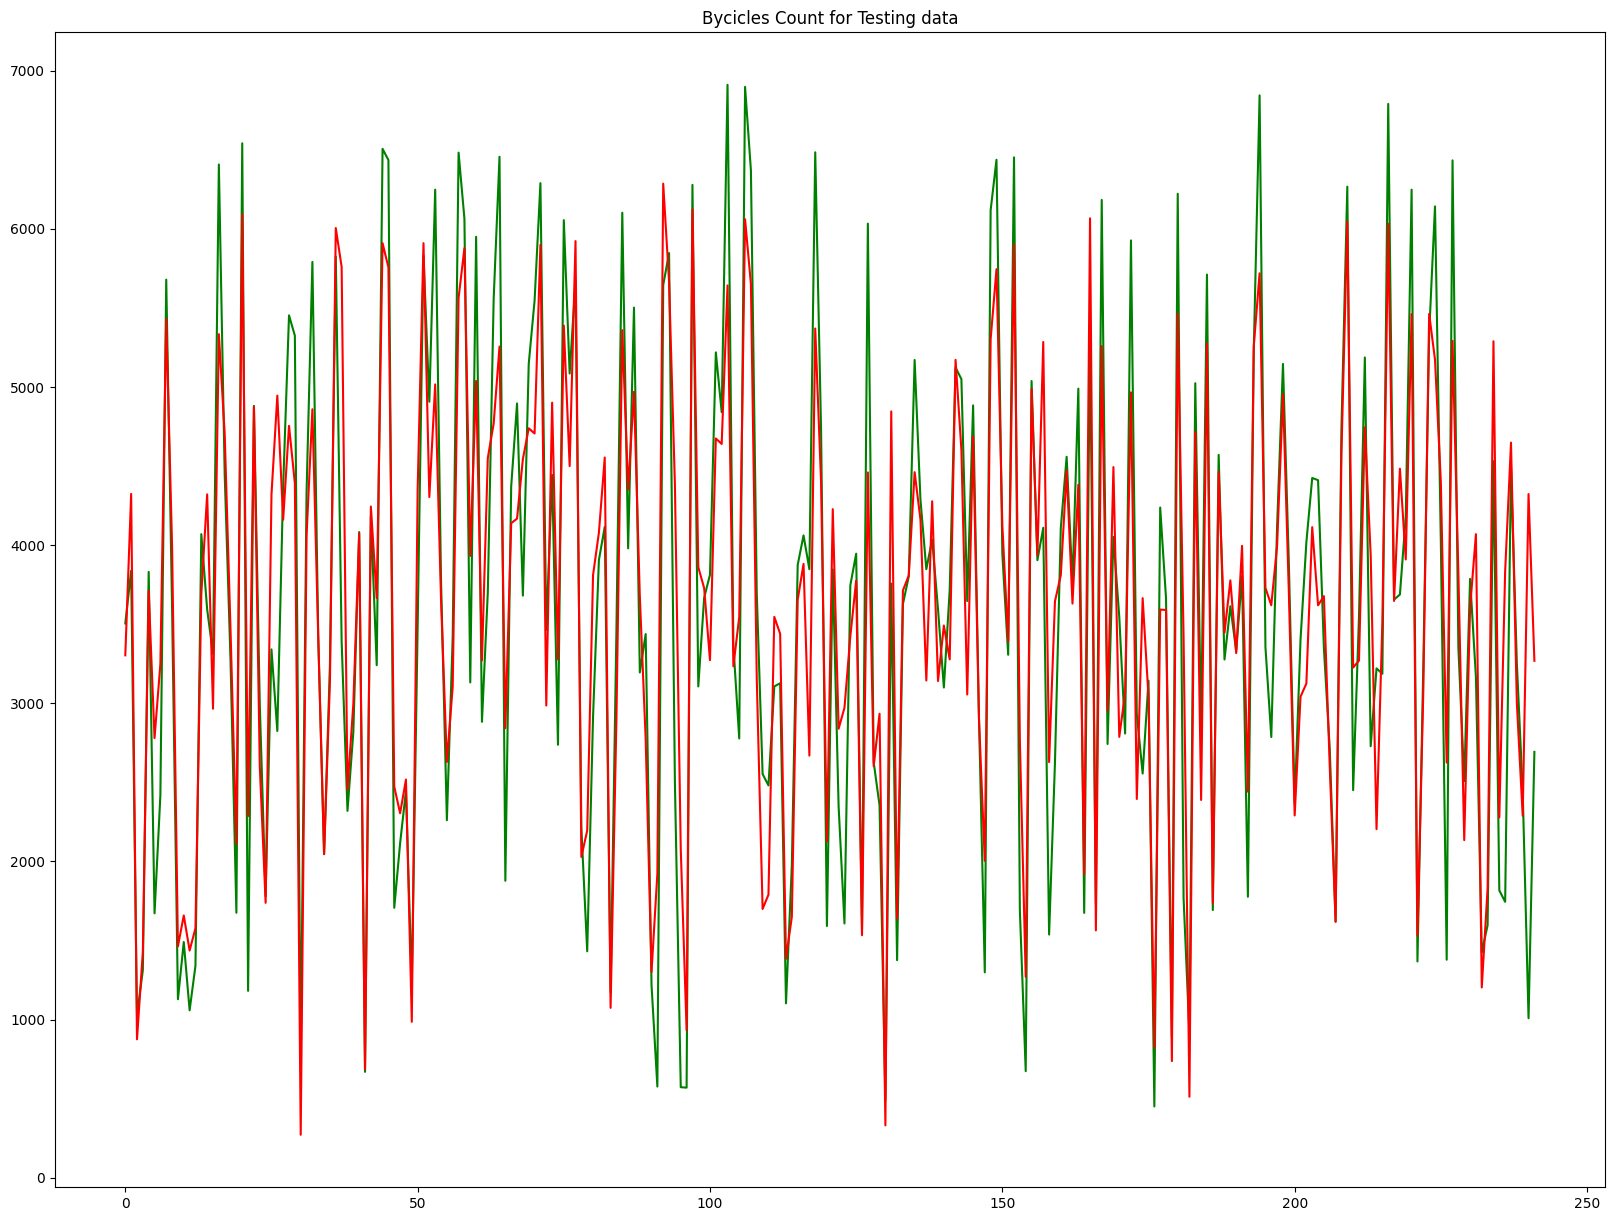

In [9]:
def predict(W, X):

    ypred = np.dot(X, W)

    return ypred


yt = predict(w, xTe)
print(np.shape(yt), np.shape(yTest))
plt.figure(figsize=(20, 15))
plt.plot(yTest, 'g')
plt.plot(yt.T, 'r')
plt.title('Bycicles Count for Testing data')


## 4. Measure the total error of the algorthim

Evaluate the model performance for each power of data by using Residual Sum of Square (RSS): $$RSS(w) = \sum_{i=1}^{N} (y_i - x_i w)^2$$

In [10]:
def rss(Y, Yt):

    cost = np.sum((Y - Yt) ** 2)

    return cost


print(np.shape(yTest), np.shape(yt))
costo = 1/len(yTest) * rss(yTest, yt)
print(costo)


(242,) (242,)
471575.2099811004


# 5. Sklearn library for linear regression

1. Using the lybrary for linear regression, obtain the predictions for testing data and calculate the cost function.
2. Determine if this algorithm is better than the closed-form solution formulas, why?

471575.20998111274


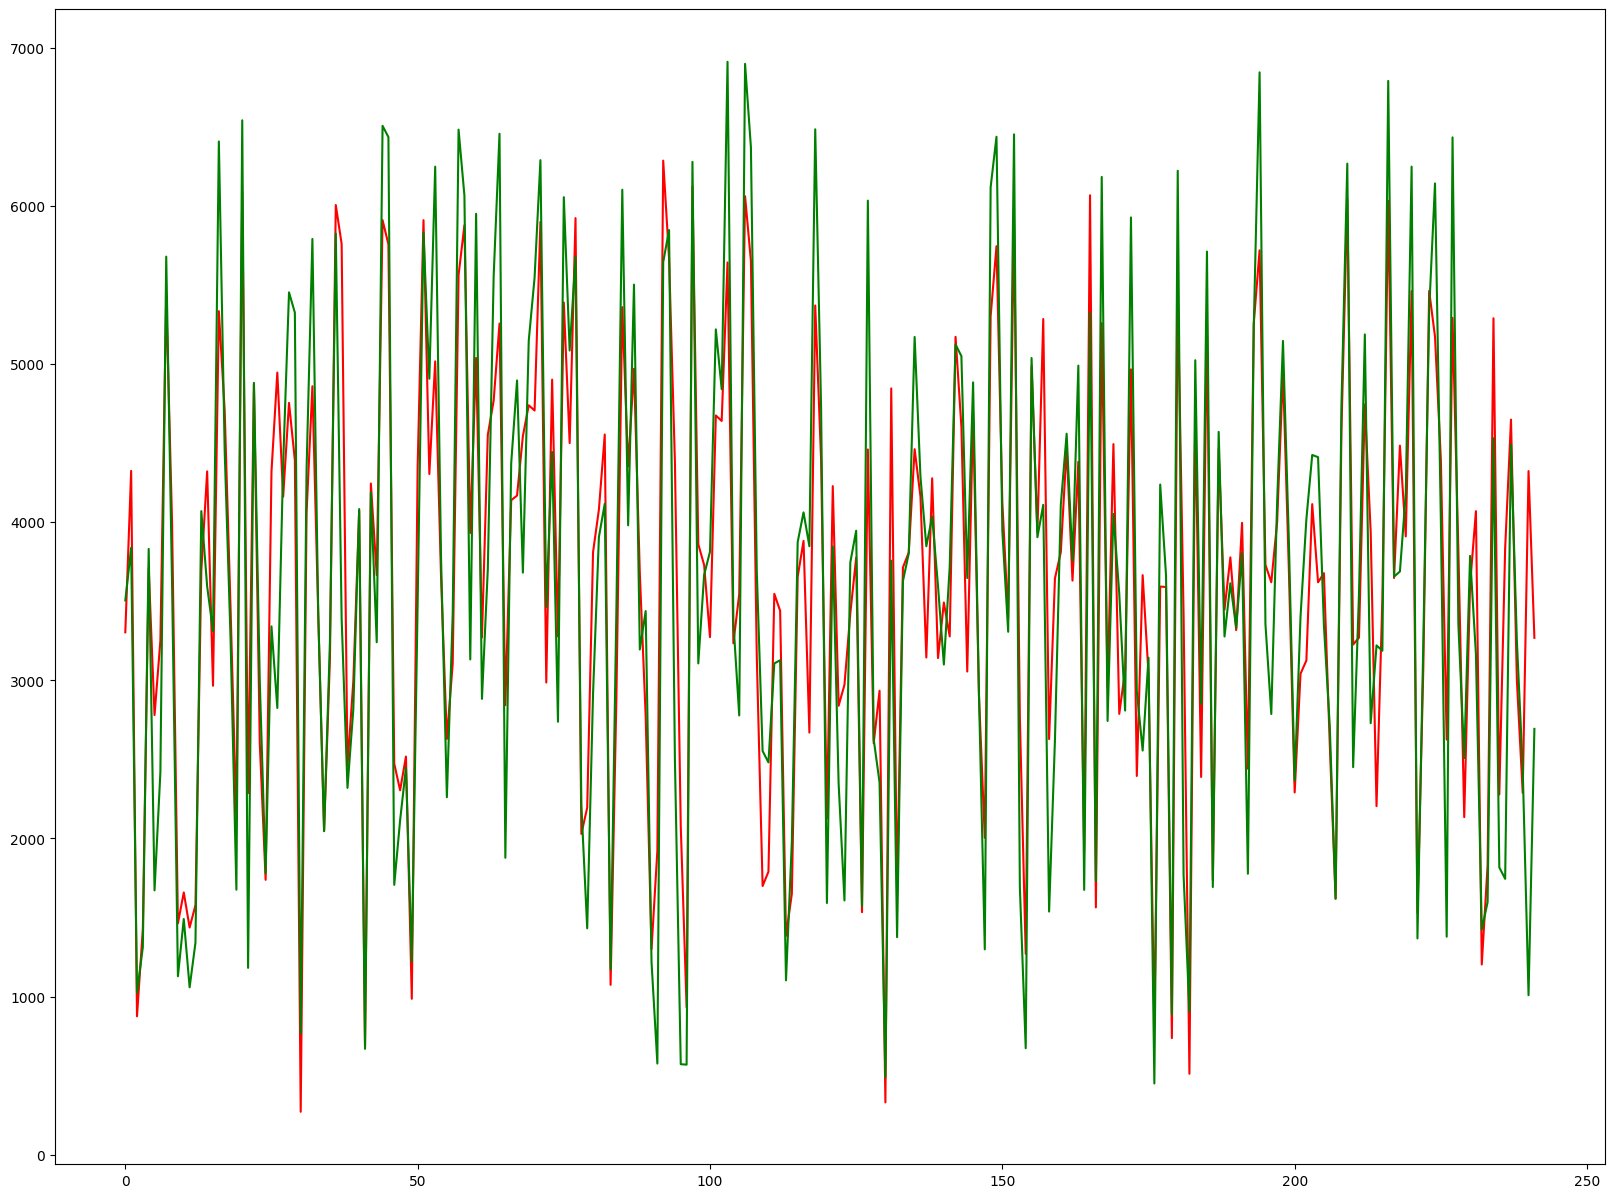

In [11]:
# Homework

from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
model = LinearRegression()
model.fit(xTrain, yTrain)

# Obtain predictions for testing data
predictions = model.predict(xTest)

# Calculate the cost function
cost = np.mean((predictions - yTest)**2)

plt.figure(figsize=(20, 15))
plt.plot(predictions, c='r')
plt.plot(yTest, c='g')



print(cost)


# 6. Add polynomial grades: 2 and 3

X size:  (731, 11) Y size:  (731,)
[[-3.11192617e+03]
 [ 7.63721473e+02]
 [ 8.31368077e+02]
 [ 3.15262853e+01]
 [-2.47258146e+02]
 [ 3.14739610e+02]
 [ 3.00959564e+02]
 [ 8.19953974e+02]
 [ 2.11870558e+04]
 [-9.68387639e+03]
 [ 3.59268010e+03]
 [-1.06233746e+03]
 [-6.71146453e+01]
 [ 8.31368076e+02]
 [-4.50889237e+00]
 [-2.47258146e+02]
 [-4.58109862e+01]
 [ 3.00959564e+02]
 [-3.74483690e+02]
 [-1.74634880e+04]
 [ 8.76444815e+03]
 [-3.93403064e+03]
 [-3.29160157e+03]]
(23, 1)
(731, 1)
costo  240888361.81202427


ValueError: x and y must be the same size

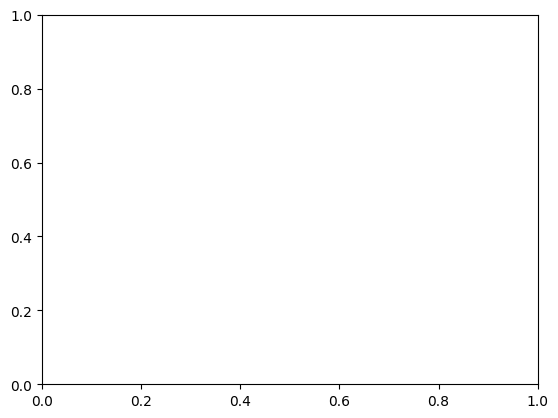

In [13]:
x, y, df_bikes = df_to_np(df_bikes)

print('X size: ', np.shape(x), 'Y size: ', np.shape(y))

x_sorted = np.sort(x)
x = np.column_stack((x, x*x))
X1 = addOnes(x)

y = y.reshape(len(y), 1)

W1 = closedForm(X1, y)
print(W1)
print(np.shape(W1))

y_hat = np.dot(X1, W1)
print(y_hat.shape)

J1 = rss(y, y_hat)
print('costo ', J1)

plt.scatter(x_sorted, y)
plt.plot(x_sorted, y_hat, c='r')